In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

**Importing the dataset**

In [9]:
df=pd.read_csv("https://raw.githubusercontent.com/Divyashanmugapriyan/Dataset/main/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
df.dtypes


User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [11]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [12]:
from sklearn import preprocessing
label_encode=preprocessing.LabelEncoder()

df["Gender"]=label_encode.fit_transform(df["Gender"])

In [13]:
df["Gender"].unique()

array([1, 0])

**Splitting the dataset into the Training set and Test set**

In [14]:
x=df[["Gender","Age","EstimatedSalary"]].values
y=df["Purchased"].values

In [17]:
 # import train_test_split function
#split dataset into test and train set.
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state= 5)
print ('Train Set: ', x_train.shape, y_train.shape)
print ('Train Set: ', x_test.shape, y_test.shape)

Train Set:  (300, 3) (300,)
Train Set:  (100, 3) (100,)


**Feature Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) # where X is your data to be scaled
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

**Fitting SVM to the Training set**

In [52]:
from sklearn import svm
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train, y_train) 

SVC()

**Predicting the Test set results**

In [54]:
z=clf.predict(x_test)

In [55]:
y_pred=clf.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**Making the Confusion Matrix**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [44]:
y_pred=clf.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,1,All
Actual,,
0,66,66
1,34,34
All,100,100


In [56]:
clf.score(x_test, y_test)

0.34

**Visualising the Training set results**

In [57]:
training_score = clf.score(x_train,y_train)*100
print("Train data score is :",training_score)

Train data score is : 90.66666666666666


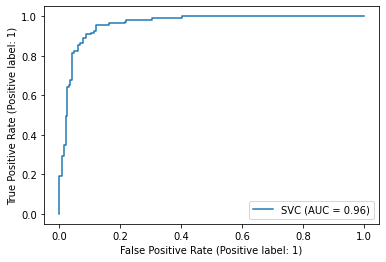

In [58]:
RocCurveDisplay.from_estimator(clf,x_train,y_train)

**Visualising the Test set results**

In [59]:
from sklearn.metrics import accuracy_score
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

Test data score is : 34.0


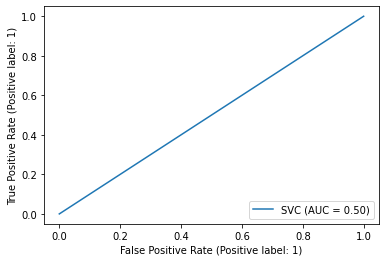

In [60]:
RocCurveDisplay.from_estimator(clf,x_test,y_test)